# Cap. 4 - Núcleo da Linguagem Python, Parte II

Este capítulo dá continuidade a apresentação da linguagem Python que começamos no Cap. 2.

## **Programação orientada a objetos**


**Classes e Operadores**


Operadores (+,-,etc) e funções nativas (len, abs, etc) atuam em objetos invocando métodos especiais cujos nomes começam e terminam com \_\_ (*dunder methods*). Podemos implementar essas funcionalidades em nossas classes simplesmente definindo esses métodos (tal como fizemos com o \_\_init\_\_). A tabela abaixo mostra os métodos especiais mais comuns:

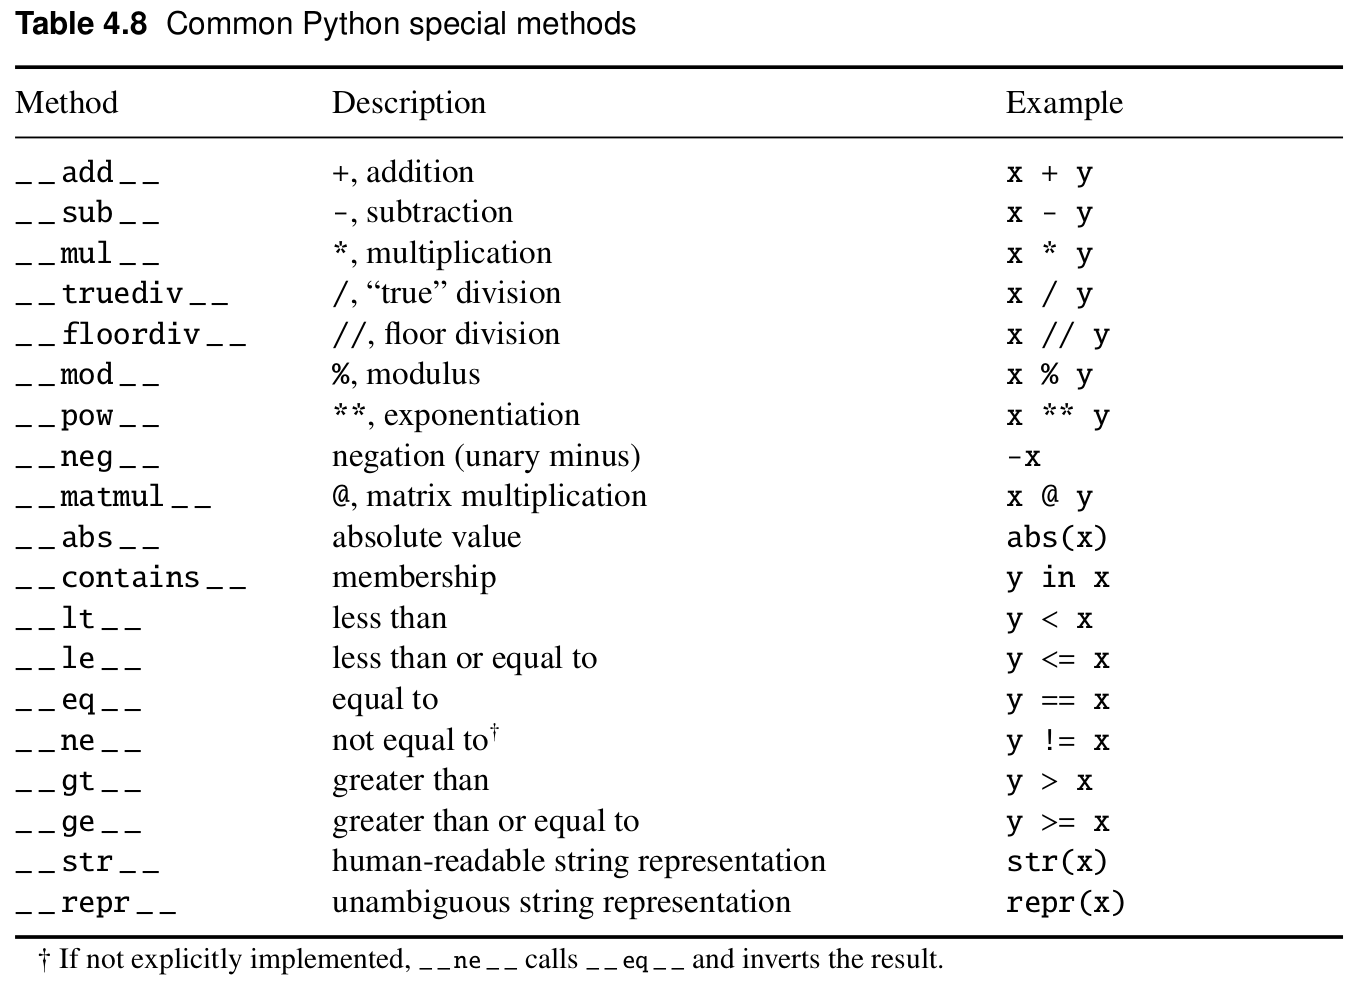

Por exemplo, suponha dois objetos (x e y) de uma dada classe. Executar

```
x+y
```
é equivalente a invocar o método \_\_add\_\_ do objeto x com argumento y:

```
x.__add__(y)
```

Pode acontecer de x e y serem de classes diferentes e caso a classe de x não tenha o método necessário, o Python vai tentar usar uma versão refletida de y.

Por exemplo, em

```
4*'a'
```

será invocado primeiro o método 4.\_\_mul\_\_('a'); porém, essa expressão vai falhar, uma vez que o argumento é str. Em seguida, o Python vai tentar a versão refletida, 'a'.\_\_rmul\_\_(4), que vai retornar 'aaaa' pois está preparada para lidar com essa situação.


Dois casos merecem atenção especial:

* \_\_str\_\_ retorna uma representação str 'legível 'do objeto;
* \_\_repr\_\_ retorna uma representação str 'inequívoca' do objeto;

Dependendo da classe, \_\_str\_\_ pode representar as propriedades essenciais de uma instância, enquanto \_\_repr\_\_ pode listar todas as informações necessárias para criar o objeto.

Vale notar ainda que caso \_\_str\_\_ não esteja definida, str(OBJ) vai chamar .\_\_repr\_\_.


Para tentar deixar mais essas ideias mais claras, vamos tomar um exemplo.


*Exemplo E4.20*. Uma classe para vetores em duas dimensões.



In [ ]:
import math

class Vector2D:
    """Vetor em duas coordenadas cartesianas."""

    def __init__(self, x, y):
        self.x, self.y = x, y

    def __str__(self):
        """Representação de string legível por humanos do vetor."""
        return '{:g}i + {:g}j'.format(self.x, self.y)

    def __repr__(self):
        """Representação de string inequívoca do vetor."""
        return repr((self.x, self.y))

    def dot(self, other):
        """Produto escalar entre e self e other (ambos dever ser da classe Vector2D)."""

        if not isinstance(other, Vector2D):
            raise TypeError('Objetos de tipos diferentes.')
        return self.x * other.x + self.y * other.y
    # define um alias ou apelido para dot. Nesse caso a @ b e a.dot(b)
    # retornam a mesma coisa.
    __matmul__ = dot

    def __sub__(self, other):
        """Subtração vetorial."""
        return Vector2D(self.x - other.x, self.y - other.y)

    def __add__(self, other):
        """Adição vetorial."""
        return Vector2D(self.x + other.x, self.y + other.y)

    def __mul__(self, scalar):
        """Multiplicação por escalar."""

        if isinstance(scalar, int) or isinstance(scalar, float):
            return Vector2D(self.x*scalar, self.y*scalar)
        raise NotImplementedError('Só é possível multiplicar Vector2D por um escalar.')

    def __rmul__(self, scalar):
        """Multiplicação refletida que torna disponível Vector2D * escalar."""
        return self.__mul__(scalar)

    def __neg__(self):
        """Negativo do vetor"""
        return Vector2D(-self.x, -self.y)

    def __truediv__(self, scalar):
        """Divisão do vetor por um escalar."""
        return Vector2D(self.x / scalar, self.y / scalar)

    def __mod__(self, scalar):
        """Implementar a operação módulo para cada componente."""
        return Vector2D(self.x % scalar, self.y % scalar)

    def __abs__(self):
        """Magnitude ou tamanho do vetor."""
        return math.sqrt(self.x**2 + self.y**2)

    def distance_to(self, other):
        """Distância entre self e other."""
        return abs(self - other)

    def to_polar(self):
        """Retorna a forma polar do vetor."""
        return self.__abs__(), math.atan2(self.y, self.x)

In [ ]:
v1 = Vector2D(2, 5/3)
v2 = Vector2D(3, -1.5)

In [ ]:
v1,v2

((2, 1.6666666666666667), (3, -1.5))

In [ ]:
print('v1 = ', v1)

v1 =  2i + 1.66667j


In [ ]:
print('repr(v1) = ', repr(v1))

repr(v1) =  (2, 1.6666666666666667)


In [ ]:
print('v1 + v2 = ', v1 + v2)

v1 + v2 =  5i + 0.166667j


In [ ]:
print('v1 - v2 = ', v1 - v2)

v1 - v2 =  -1i + 3.16667j


In [ ]:
print('abs(v2 - v1) = ', abs(v2 - v1))

abs(v2 - v1) =  3.3208098075285464


In [ ]:
print('-v2 = ', -v2)

-v2 =  -3i + 1.5j


In [ ]:
print('v1 * 3 = ', v1 * 3)

v1 * 3 =  6i + 5j


In [ ]:
print('7 * v2 = ', 7 * v2)

7 * v2 =  21i + -10.5j


In [ ]:
print('v2 / 2.5 = ', v2 / 2.5)

v2 / 2.5 =  1.2i + -0.6j


In [ ]:
print('v1 % 1 = ', v1 % 1)

v1 % 1 =  0i + 0.666667j


In [ ]:
print('v1.dot(v2) = v1 @ v2 = ', v1 @ v2)

v1.dot(v2) = v1 @ v2 =  3.5


In [ ]:
 print('v1.dot(v2) = v1 @ v2 = ', v1.dot(v2))

v1.dot(v2) = v1 @ v2 =  3.5


In [ ]:
print('v1.distance_to(v2) = ', v1.distance_to(v2))

v1.distance_to(v2) =  3.3208098075285464


In [ ]:
print('v1 as polar vector, (r, theta) =', v1.to_polar())

v1 as polar vector, (r, theta) = (2.6034165586355518, 0.6947382761967033)


*Exemplo E4.21*: Dinâmica molecular de esferas duras no plano.

Para fazer isso, vamos usar a classe que acabamos de definir para representar a posição e velocidade dessas partículas.

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [ ]:
class Particle:
    """Esfera dura em 2d com raio, massa unitária, posição e velocidade."""

    def __init__(self, x, y, vx, vy, radius=0.01):
        self.pos = Vector2D(x, y)
        self.vel = Vector2D(vx, vy)
        self.radius = radius

    def advance(self, dt):
        """Atualiza a posição da partícula com base em sua velocidade e dt."""

        # O % implementa condições periódicas de contorno no intervalo
        # 0<=x<1 e 0<=y<1
        self.pos = (self.pos + self.vel * dt) % 1

    def distance_to(self, other):
        """Distância entre as partículas self e other."""
        return self.pos.distance_to(other.pos)

    def get_speed(self):
        """Velocidade da partícula."""
        return abs(self.vel)

In [ ]:
p1 = Particle(0.5,0.5,-0.1,0)

p2 = Particle(0.8,0.5,0.1,0.1)

In [ ]:
p1.distance_to(p2)

0.30000000000000004

In [ ]:
p1.get_speed(),p2.get_speed()

(0.1, 0.14142135623730953)

In [ ]:
(0.1**2+0.1**2)**0.5

0.14142135623730953

In [ ]:
print(p1.pos)
p1.advance(1)
print(p1.pos)

0.5i + 0.5j
0.4i + 0.5j


In [ ]:
print(p1.pos)
p1.advance(1)
print(p1.pos)

0.4i + 0.5j
0.3i + 0.5j


In [ ]:
print(p1.pos)
p1.advance(1)
print(p1.pos)

0.3i + 0.5j
0.2i + 0.5j


In [ ]:
print(p1.pos)
p1.advance(1)
print(p1.pos)

0.2i + 0.5j
0.1i + 0.5j


In [ ]:
print(p1.pos)
p1.advance(1)
print(p1.pos)

0.1i + 0.5j
2.77556e-17i + 0.5j


In [ ]:
print(p1.pos)
p1.advance(1)
print(p1.pos)

2.77556e-17i + 0.5j
0.9i + 0.5j


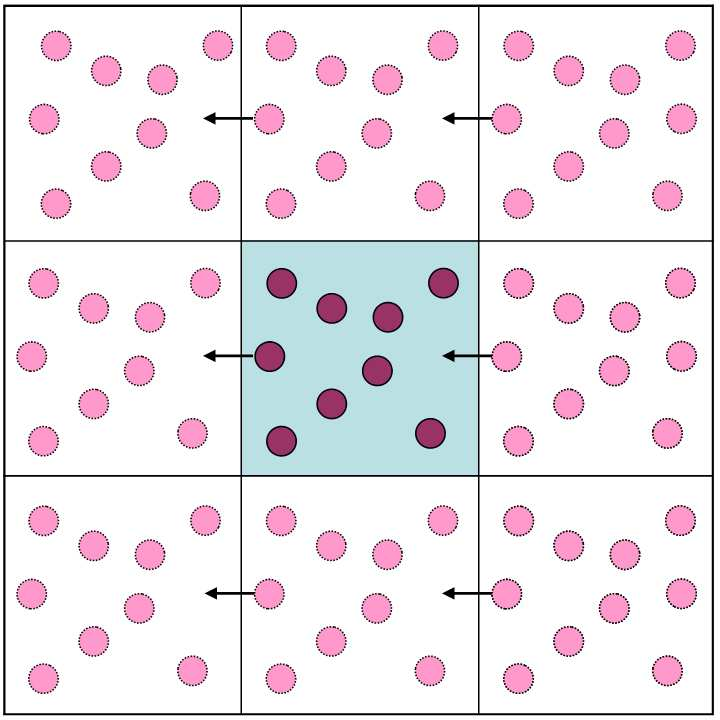

In [ ]:
class Simulation:
    """Simulação do movimento das partículas."""

    def __init__(self, nparticles=100, radius=0.01, v0=0.05):
        #número de partículas
        self.nparticles = nparticles
        #raio das partículas
        self.radius = radius
        #inicializa a posição e velocidade de todas as partículas.
        self.particles = [self.init_particle(v0) for i in range(nparticles)]
        #tempo
        self.t = 0

    def init_particle(self, v0=0.05):
        """Retorna um partículas com posição aleatória 0 <= x < 1 e 0 <= y < 1,
        módulo de velocidade v0, mas direção do vetor velocidade aleatória.
        """

        x, y = random.random(), random.random()
        theta = 2*math.pi * random.random()
        self.v0 = v0
        vx, vy = self.v0 * math.cos(theta), self.v0 * math.sin(theta)
        return Particle(x, y, vx, vy, self.radius)

    def advance(self, dt):
        """Avança um passo dt na simulação."""

        self.t += dt
        for particle in self.particles:
            particle.advance(dt)

        #varre todos os pares de partículas em busca de colisões.
        colliding_pair = []
        for i in range(self.nparticles):
            pi = self.particles[i]
            for j in range(i+1, self.nparticles):
                pj = self.particles[j]
                #pi colide com pj se a distância entre elas é menor que
                #duas vezes o raio das partículas
                if pi.distance_to(pj) < 2 * self.radius:
                    #salva os pares em colisão
                    colliding_pair.append((i, j))

        # print('ncollisions =', len(colliding_pair))

        # para cada par de colisão, mudamos suas velocidades usando
        # dinâmica clássica e supondo uma colisão perfeitamente elástica
        for i,j in colliding_pair:
            #seleciona o par p1 e p2 em colisão
            p1, p2 = self.particles[i], self.particles[j]
            #usa r1 e r2 para armazenar a posição de p1 e p2
            r1, r2 = p1.pos, p2.pos
            v1, v2 = p1.vel, p2.vel
            #usa v1 e v2 para armazenar a velocidade de p1 e p2
            dr, dv = r2 - r1, v2 - v1
            dv_dot_dr = dv.dot(dr)
            d = r1.distance_to(r2) ** 2

            p1.vel = v1 + dv_dot_dr / d * dr
            p2.vel = v2 - dv_dot_dr / d * dr

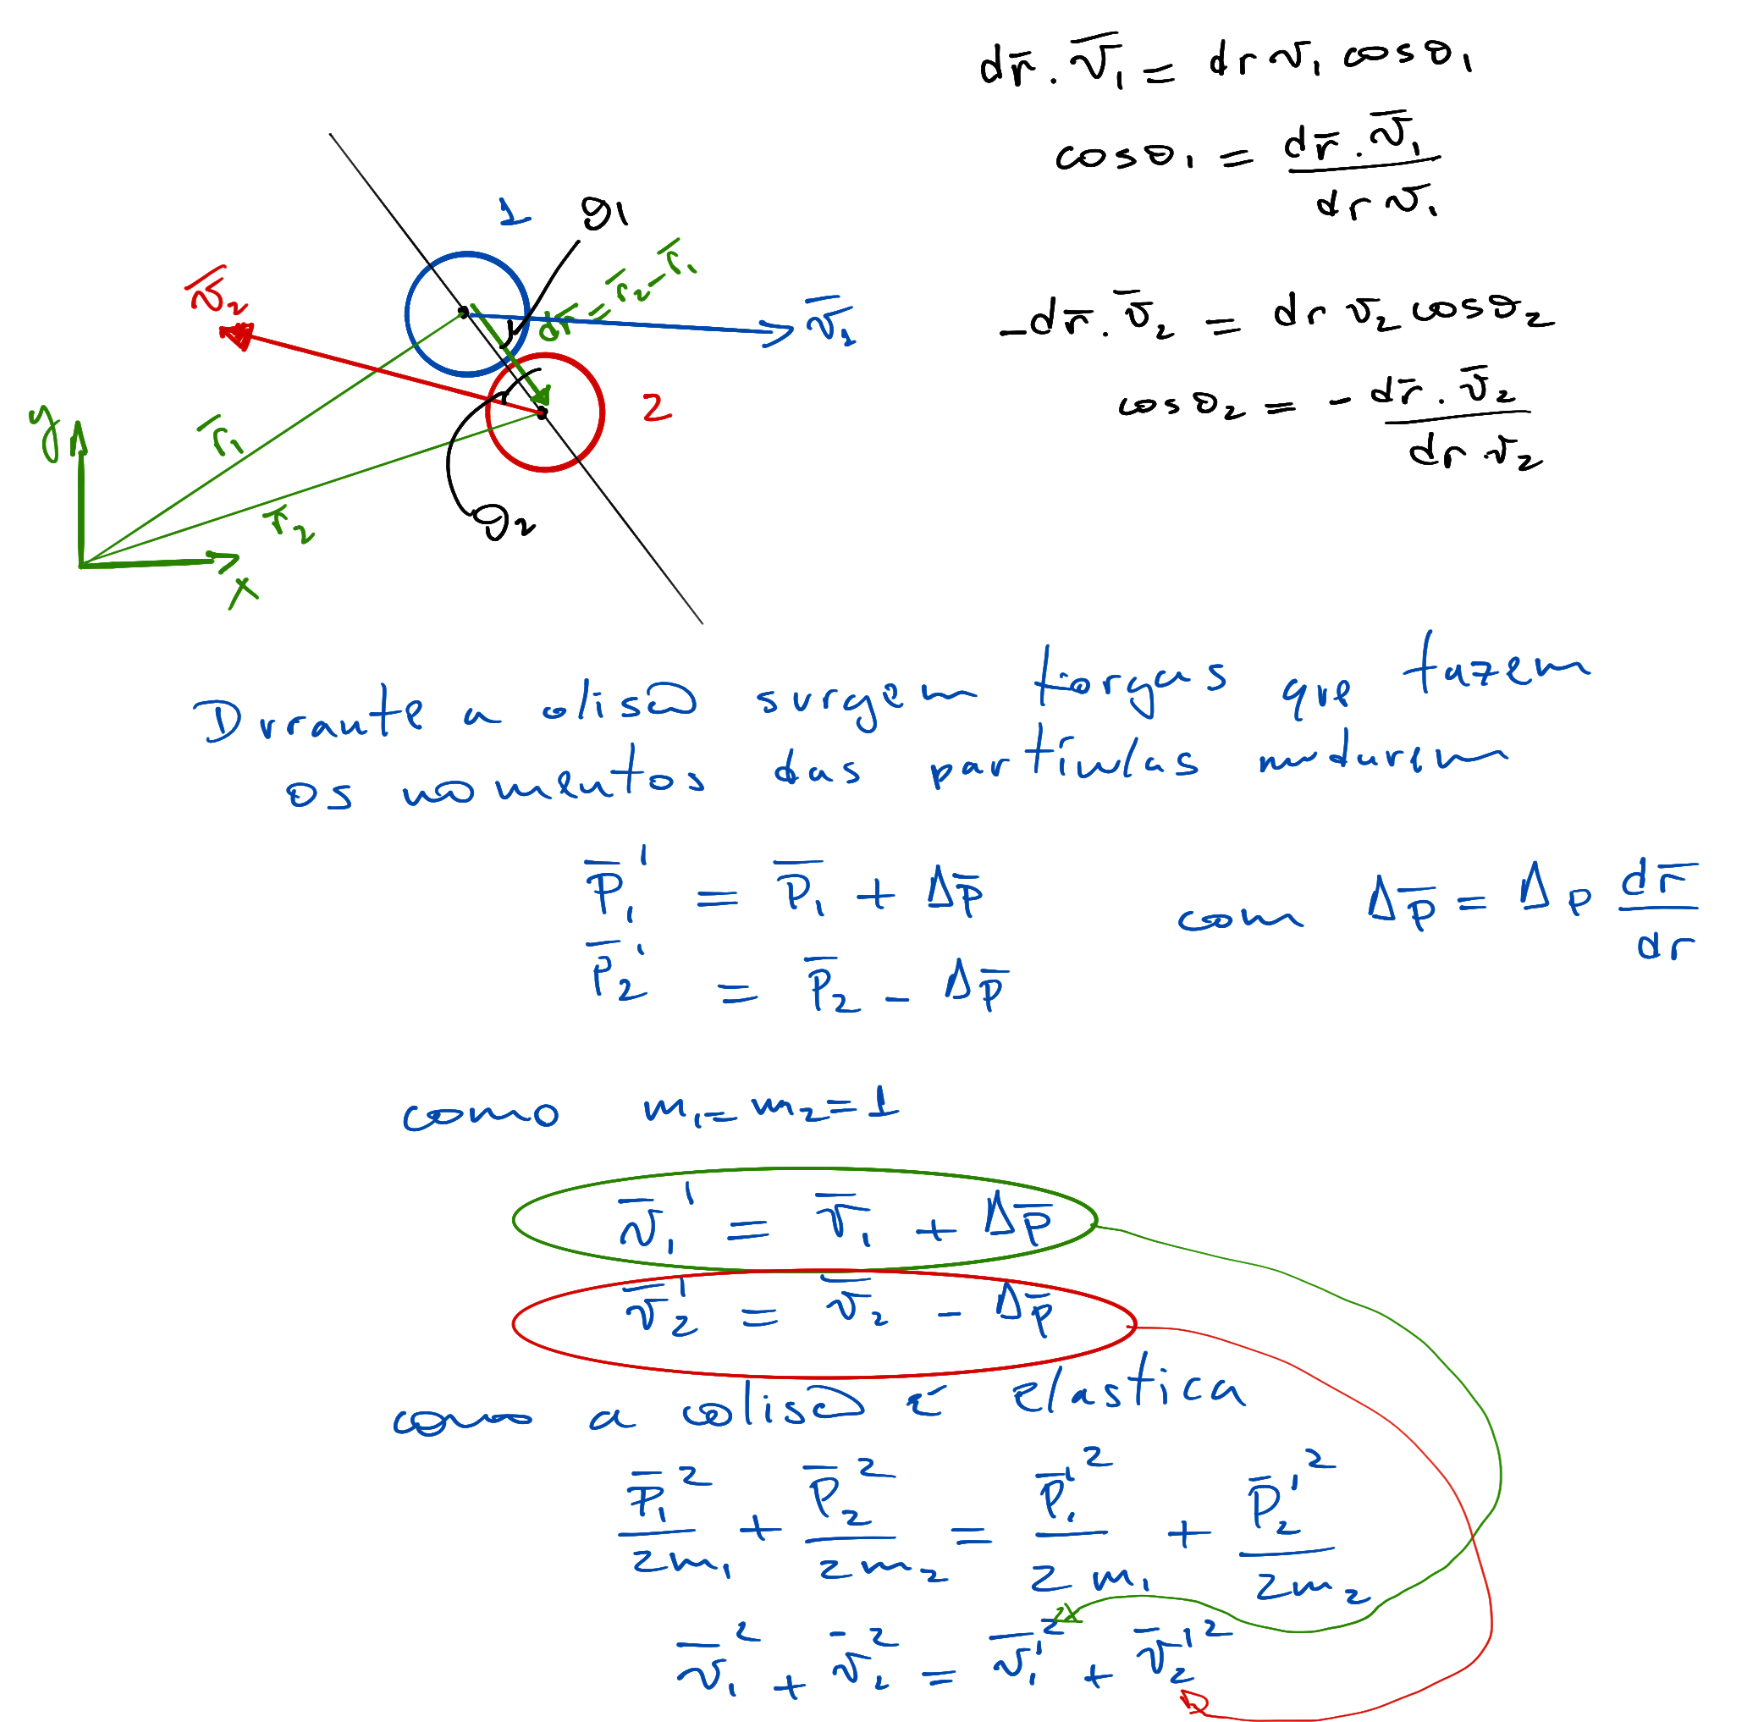

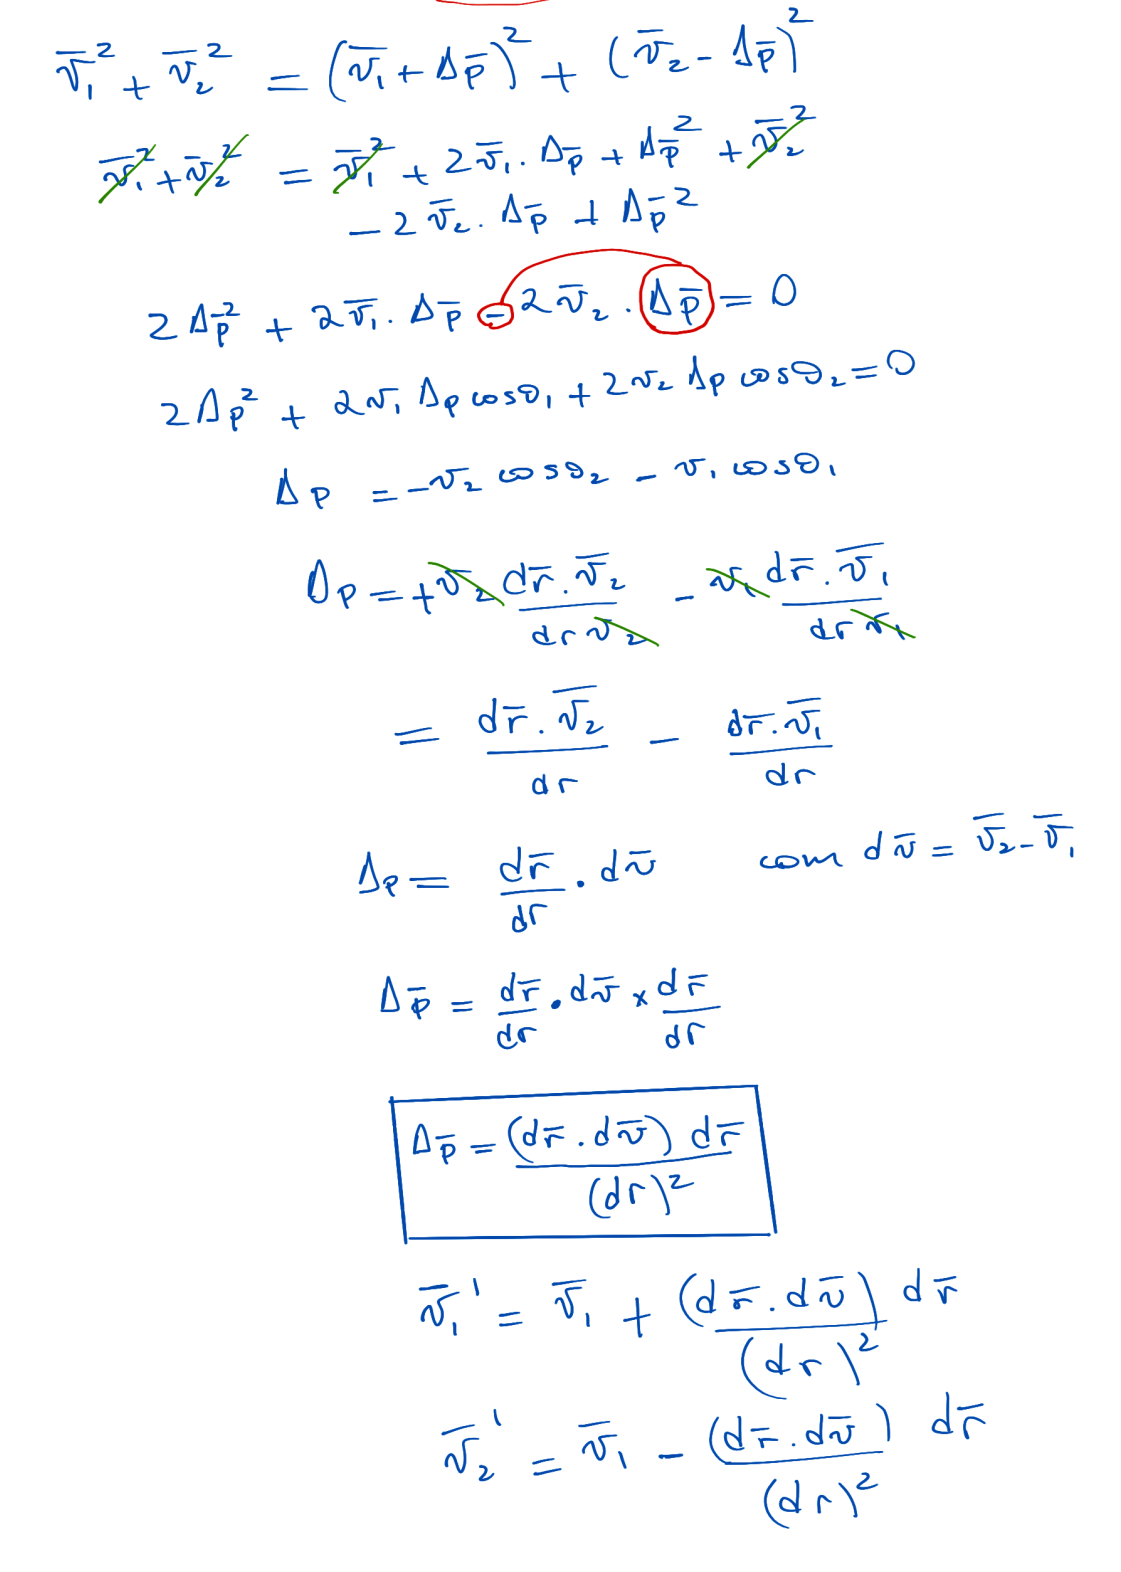

In [ ]:
dt = 1
radius = 0.1

sim = Simulation(nparticles=2, radius=radius, v0=0.05)

In [ ]:
sim.particles[1].pos

(0.2659456994486239, 0.9144848030793429)

In [ ]:
pos_ini = np.array([[p.pos.x,p.pos.y] for p in sim.particles])

In [ ]:
pos_ini

array([[0.75965646, 0.28268897],
       [0.2659457 , 0.9144848 ]])

In [ ]:
import matplotlib as mpl

In [ ]:
pos_ini

(0.0, 1.0)

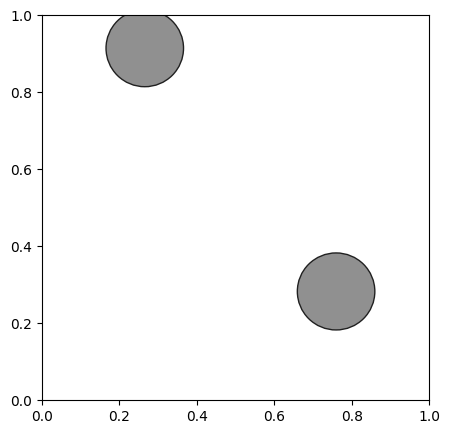

In [ ]:
f, ax = plt.subplots(figsize=(5,5))

circles = [plt.Circle((pos_[0],pos_[1]), radius=radius) for pos_ in pos_ini]
c = mpl.collections.PatchCollection(circles, linewidth=1,
                                    facecolor='#909090',
                                    edgecolor='#202020')
ax.add_collection(c)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
# plt.grid()

In [ ]:
def plot_pos(particles, radius=0.1):

    ps = np.array([[p.pos.x,p.pos.y] for p in particles])

    f, ax = plt.subplots(figsize=(5,5))

    circles = [plt.Circle((pos_[0],pos_[1]), radius=radius) for pos_ in ps]
    c = mpl.collections.PatchCollection(circles, linewidth=1,
                                        facecolor='#909090',
                                        edgecolor='#202020')
    ax.add_collection(c)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

    return c

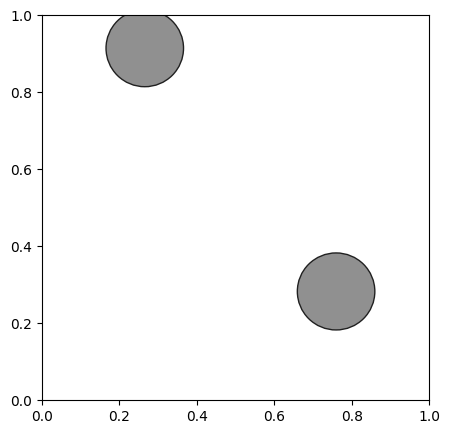

In [ ]:
plot_pos(sim.particles)

[[0.07311911 0.27024792]
 [0.64055074 0.46683828]]


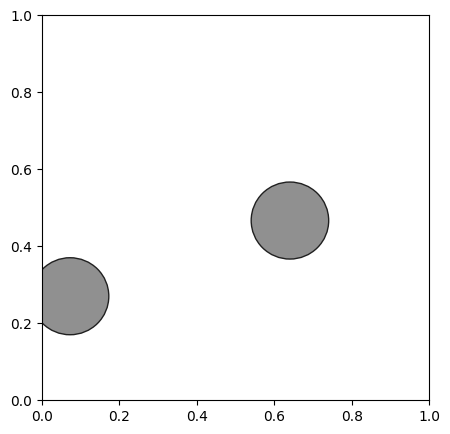

In [ ]:
sim.advance(dt)
plot_pos(sim.particles)
print(np.array([[p.pos.x,p.pos.y] for p in sim.particles]))

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.animation as animation

In [ ]:
dt = 1
radius = 0.1
nparticles = 2

sim = Simulation(nparticles=nparticles, radius=radius, v0=0.05)

(0.0, 1.0)

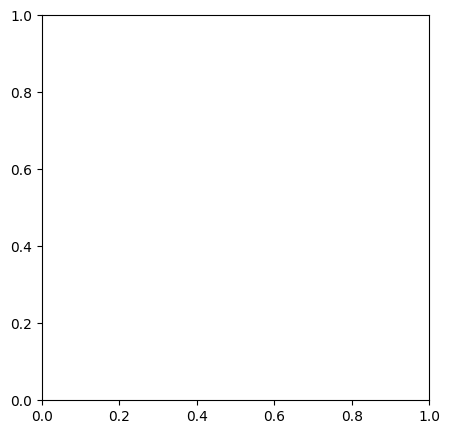

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(0,1)
ax.set_ylim(0,1)

In [ ]:
def frame(w):

    ax.clear()
    ps = np.array([[p.pos.x,p.pos.y] for p in sim.particles])

    circles = [plt.Circle((pos_[0],pos_[1]), radius=radius) for pos_ in ps]
    c = mpl.collections.PatchCollection(circles, linewidth=1,
                                        facecolor='#909090',
                                        edgecolor='#202020')
    ax.add_collection(c)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

    sim.advance(dt)

    return c

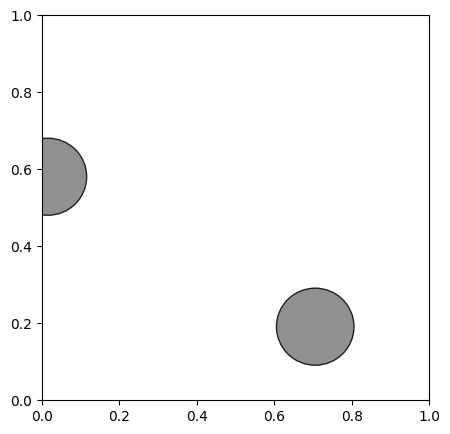

In [ ]:
frame(1)
f

In [ ]:
anim = animation.FuncAnimation(f, frame, frames=200, blit=False, repeat=False)

In [ ]:
anim

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

import matplotlib.animation as animation

def vis_sim(dt=1,radius=0.1, nparticles=2, v0=0.05, iteracoes=100, interval=100):
    sim = Simulation(nparticles=nparticles, radius=radius, v0=v0)

    f, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    f.tight_layout()
    plt.close(f)
    def frame(w):
        ax.clear()
        ps = np.array([[p.pos.x,p.pos.y] for p in sim.particles])

        circles = [plt.Circle((pos_[0],pos_[1]), radius=radius) for pos_ in ps]
        c = mpl.collections.PatchCollection(circles, linewidth=0.5,
                                            facecolor='#909090',
                                            edgecolor='#202020')
        ax.add_collection(c)

        ax.set_xlim(0,1)
        ax.set_ylim(0,1)

        sim.advance(dt)

        return c

    anim = animation.FuncAnimation(f, frame, frames=iteracoes,
                                   blit=False, repeat=True, interval=interval)
    return anim

In [ ]:
anim = vis_sim(nparticles=10,radius=0.01)
anim

In [ ]:
mpl.rcParams['animation.embed_limit'] = 2**128

In [ ]:
anim150 = vis_sim(dt=0.05, radius=0.01, nparticles=150,
                  interval=20, iteracoes=500, v0=0.1)

In [ ]:
#~2min
anim150

In [ ]:
import tqdm

In [ ]:
velocidades2 = velocidades.copy()

In [ ]:
#~5min
dt = 0.02
sim = Simulation(nparticles=800, radius=0.005, v0=0.05)

velocidades = []

for i in tqdm.tqdm(range(500)):
    sim.advance(dt)

    if (i % 50) == 0:
        velocidades += [[p.get_speed() for p in sim.particles]]

  2%|▏         | 8/500 [00:23<24:21,  2.97s/it]


KeyboardInterrupt: ignored

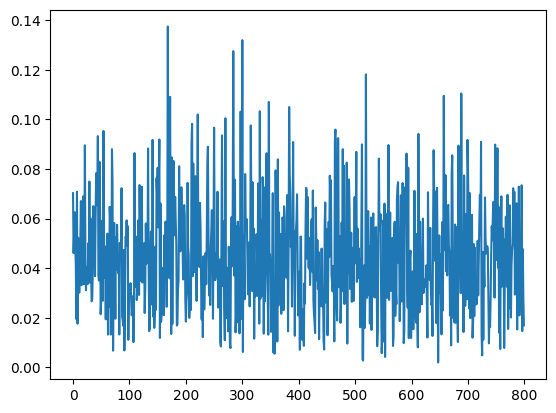

In [ ]:
plt.plot(velocidades[-1])

No equilíbrio, devemos esperar que a distribuição de velocidades se aproxime da distribuição de Maxwell-Boltzmann (em duas dimensões):

$$
p(v) = \frac{v}{\kappa} \exp\left(-\frac{v^2}{2 \kappa}\right)
$$

com
$$
\kappa = \frac{k T}{m} = \frac{m v_0^2}{2}
$$

sendo a energia média por partícula.

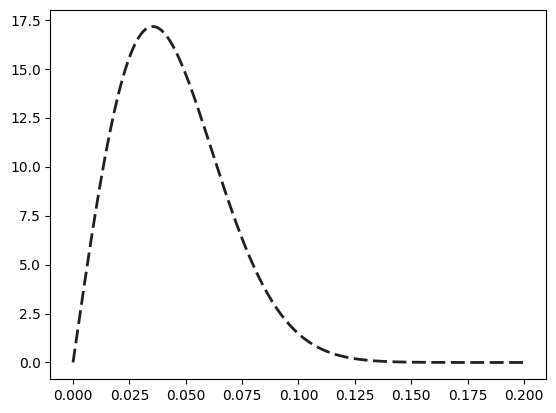

In [ ]:
kappa = sim.v0**2/2.

vrange = np.linspace(0,0.2,num=200)
pteo = (vrange/kappa)*np.exp(-vrange**2/(2*kappa))

plt.plot(vrange, pteo, color='#202020', lw=2, dashes=(5,2))

In [ ]:
!pip install palettable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 5.7 MB/s eta 0:00:00


In [ ]:
import palettable

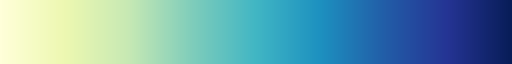

In [ ]:
palettable.colorbrewer.sequential.YlGnBu_9.get_mpl_colormap()

In [ ]:
colors = palettable.colorbrewer.sequential.YlGnBu_9.hex_colors

In [ ]:
colors

['#FFFFD9',
 '#EDF8B1',
 '#C7E9B4',
 '#7FCDBB',
 '#41B6C4',
 '#1D91C0',
 '#225EA8',
 '#253494',
 '#081D58']

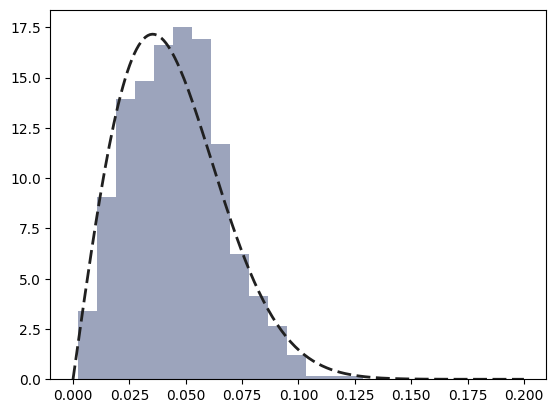

In [ ]:
kappa = sim.v0**2/2.

vrange = np.linspace(0,0.2,num=200)
pteo = (vrange/kappa)*np.exp(-vrange**2/(2*kappa))

plt.plot(vrange, pteo, color='#202020', lw=2, dashes=(5,2))

plt.hist(velocidades[4], bins=15, density=True, alpha=0.4,color=colors[-1]);

# plt.ylim(0,18)

(0.0, 0.2)

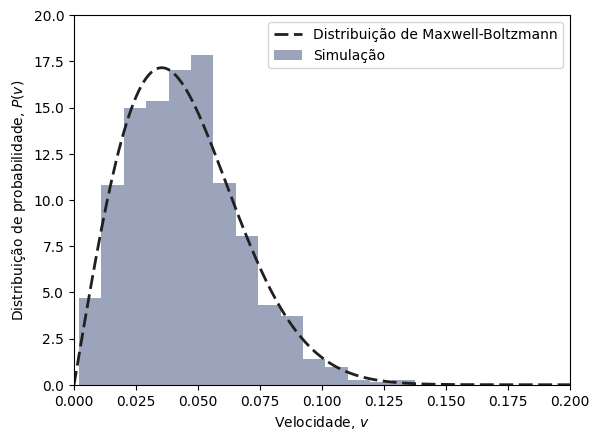

In [ ]:
kappa = sim.v0**2/2.

vrange = np.linspace(0,0.2,num=200)
pteo = (vrange/kappa)*np.exp(-vrange**2/(2*kappa))

plt.plot(vrange, pteo, color='#202020', lw=2, dashes=(5,2),
         label='Distribuição de Maxwell-Boltzmann')
plt.hist(velocidades[-1], bins=15, density=True, alpha=0.4,color=colors[-1],
         label='Simulação')
plt.xlabel('Velocidade, $v$')
plt.ylabel('Distribuição de probabilidade, $P(v)$')
plt.legend()

plt.ylim(0,20)
plt.xlim(0,.2)